8/22/2020

# Summary
All related code/figures for oSBM for ICWSM revision. Code organization assumes working directory is notebook folder location. Note, this notebook pulls ReFeX generated features which happen in another script which we modify to create different recursions.

In [2]:
import sys
print(sys.version)
from __future__ import division
import os
#import igraph
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats.kde import gaussian_kde
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter
# relevant python libraries
execfile('python_libraries.py')
# oSBM code
from sklearn.model_selection import RandomizedSearchCV


execfile('create_oSBM_class_specific_alternative.py')
execfile('LINK_revised.py')
execfile('compute_homophily.py')


2.7.15 |Anaconda, Inc.| (default, Oct 23 2018, 13:35:16) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


/Users/kristen/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### create 4 graph instances: noB-noO, yesB-noO, noB-yesO, yesB-yesO

#### 1) Amherst-analog: homophily, equal classes (no ReFeX)

In [3]:
## note have 500/1500 set-up for comparison as we change homophily
( adj_matrix_gender, gender_y) = create_affiliation_model_temp(84,
                                          lambda_block_parameter =1.1,
                                          dispersion_parameter_vect = np.array([np.array([0, 0]),
                                            np.array([0, 0])]),
                                          class_size_vect = np.array([1000,1000]))

('p_in: ', 0.046200000000000005)
('p_out: ', 0.03779999999999999)



In [4]:
tag = 'Amherst_analog_SBM_by_degree_within_nw'

In [5]:
## WITHIN-NETWORK
gender_y = np.array(map(np.int,gender_y)) ## need np.int for machine precisions reasons
d = {'keys':range(len(gender_y)),
    'gender_y':gender_y}
y_df = pd.DataFrame(d)
Gnx = nx.from_numpy_matrix(adj_matrix_gender,
                           create_using=nx.DiGraph())
fb100_df_tmp = []
for j in nx.generate_edgelist(Gnx, data = False):
    fb100_df_tmp.append(map(np.int,j.split(' ')))
fb100_df = pd.DataFrame(fb100_df_tmp)
fb100_df.columns = ['from','to']
fb100_df_undirect = fb100_df.copy()
fb100_df_undirect['to'] = fb100_df['from']
fb100_df_undirect['from'] = fb100_df['to']
fb100_df = fb100_df.append(fb100_df_undirect)
fb100_df['weight'] = 1
fb100_df.head()
fb100_df.drop_duplicates(inplace = True)
## save output
fb100_df.to_csv('../../data/SBM_ICWSM_revise/train_'+tag+'.csv', header = False, index = False)
y_df.to_csv('../../data/SBM_ICWSM_revise/train_'+tag+'_gender.csv', header = True, index = False)


In [6]:
## Increasing Homophily/Block Structure
## Across-Layer Set-up
for iter_num in range(10):
    print('instance: '+str(iter_num))
    for block in np.array([1.1, 1.2, 1.3, 1.4, 1.5]):
        ( adj_matrix_gender, gender_y) = create_affiliation_model_temp(84,
                                              lambda_block_parameter =block,
                                              dispersion_parameter_vect = np.array([np.array([0, 0]),
                                                np.array([0, 0])]),
                                        class_size_vect = np.array([1000,1000]))

        #print('avg degree',np.mean(np.sum(adj_matrix_gender,1)))
        #print('avg degree among Class 1',np.mean(np.sum(adj_matrix_gender[gender_y==1],1)))
        #print('max degree among Class 1',np.max(np.array(np.sum(adj_matrix_gender[gender_y==1],1).T[0])[0]))

        #print('avg degree among Class 0',np.mean(np.sum(adj_matrix_gender[gender_y==0],1)))
        #print('max degree among Class 0',np.max(np.array(np.sum(adj_matrix_gender[gender_y==0],1).T[0])[0]))

        #print('homophily', homophily_index_Jackson_alternative(adj_matrix_gender, gender_y))
        tag = str(iter_num) + '_Amherst_analog_SBM_across_layer_' + str(block)

        gender_y = np.array(map(np.int,gender_y)) ## need np.int for machine precisions reasons
        d = {'keys':range(len(gender_y)),
            'gender_y':gender_y}
        y_df = pd.DataFrame(d)
        Gnx = nx.from_numpy_matrix(adj_matrix_gender,
                                   create_using=nx.DiGraph())
        fb100_df_tmp = []
        for j in nx.generate_edgelist(Gnx, data = False):
            fb100_df_tmp.append(map(np.int,j.split(' ')))
        fb100_df = pd.DataFrame(fb100_df_tmp)
        fb100_df.columns = ['from','to']
        fb100_df_undirect = fb100_df.copy()
        fb100_df_undirect['to'] = fb100_df['from']
        fb100_df_undirect['from'] = fb100_df['to']
        fb100_df = fb100_df.append(fb100_df_undirect)
        fb100_df['weight'] = 1
        fb100_df.head()
        fb100_df.drop_duplicates(inplace = True)
        fb100_df.to_csv('../../data/SBM_ICWSM_revise/'+tag+'.csv', header = False, index = False)
        y_df.to_csv('../../data/SBM_ICWSM_revise/'+tag+'_gender.csv', header = True, index = False)


instance: 0
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03779999999999999)

('p_in: ', 0.0504)
('p_out: ', 0.0336)

('p_in: ', 0.0546)
('p_out: ', 0.0294)

('p_in: ', 0.0588)
('p_out: ', 0.0252)

('p_in: ', 0.063)
('p_out: ', 0.021)

instance: 1
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03779999999999999)

('p_in: ', 0.0504)
('p_out: ', 0.0336)

('p_in: ', 0.0546)
('p_out: ', 0.0294)

('p_in: ', 0.0588)
('p_out: ', 0.0252)

('p_in: ', 0.063)
('p_out: ', 0.021)

instance: 2
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03779999999999999)

('p_in: ', 0.0504)
('p_out: ', 0.0336)

('p_in: ', 0.0546)
('p_out: ', 0.0294)

('p_in: ', 0.0588)
('p_out: ', 0.0252)

('p_in: ', 0.063)
('p_out: ', 0.021)

instance: 3
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03779999999999999)

('p_in: ', 0.0504)
('p_out: ', 0.0336)

('p_in: ', 0.0546)
('p_out: ', 0.0294)

('p_in: ', 0.0588)
('p_out: ', 0.0252)

('p_in: ', 0.063)
('p_out: ', 0.021)

instance: 4
('p_in: ', 0.046200000000000005)
('p_out

In [7]:
## Increasing Homophily/Block Structure
## Across-Network Set-up
for iter_num in range(10):
    print('instance: '+str(iter_num))
    for block in np.array([1.1, 1.2, 1.3, 1.4, 1.5]):
        ( adj_matrix_gender, gender_y) = create_affiliation_model_temp(84,
                                              lambda_block_parameter =block,
                                              dispersion_parameter_vect = np.array([np.array([0, 0]),
                                                np.array([0, 0])]),
                                        class_size_vect = np.array([500,1500]))

        #print('avg degree',np.mean(np.sum(adj_matrix_gender,1)))
        #print('avg degree among Class 1',np.mean(np.sum(adj_matrix_gender[gender_y==1],1)))
        #print('max degree among Class 1',np.max(np.array(np.sum(adj_matrix_gender[gender_y==1],1).T[0])[0]))

        #print('avg degree among Class 0',np.mean(np.sum(adj_matrix_gender[gender_y==0],1)))
        #print('max degree among Class 0',np.max(np.array(np.sum(adj_matrix_gender[gender_y==0],1).T[0])[0]))

        #print('homophily', homophily_index_Jackson_alternative(adj_matrix_gender, gender_y))
        tag = str(iter_num) + '_Amherst_analog_SBM_across_network_' + str(block)

        gender_y = np.array(map(np.int,gender_y)) ## need np.int for machine precisions reasons
        d = {'keys':range(len(gender_y)),
            'gender_y':gender_y}
        y_df = pd.DataFrame(d)
        Gnx = nx.from_numpy_matrix(adj_matrix_gender,
                                   create_using=nx.DiGraph())
        fb100_df_tmp = []
        for j in nx.generate_edgelist(Gnx, data = False):
            fb100_df_tmp.append(map(np.int,j.split(' ')))
        fb100_df = pd.DataFrame(fb100_df_tmp)
        fb100_df.columns = ['from','to']
        fb100_df_undirect = fb100_df.copy()
        fb100_df_undirect['to'] = fb100_df['from']
        fb100_df_undirect['from'] = fb100_df['to']
        fb100_df = fb100_df.append(fb100_df_undirect)
        fb100_df['weight'] = 1
        fb100_df.head()
        fb100_df.drop_duplicates(inplace = True)
        fb100_df.to_csv('../../data/SBM_ICWSM_revise/'+tag+'.csv', header = False, index = False)
        y_df.to_csv('../../data/SBM_ICWSM_revise/'+tag+'_gender.csv', header = True, index = False)


instance: 0
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03499999999999999)

('p_in: ', 0.0504)
('p_out: ', 0.028)

('p_in: ', 0.0546)
('p_out: ', 0.021)

('p_in: ', 0.0588)
('p_out: ', 0.014)

('p_in: ', 0.063)
('p_out: ', 0.007)

instance: 1
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03499999999999999)

('p_in: ', 0.0504)
('p_out: ', 0.028)

('p_in: ', 0.0546)
('p_out: ', 0.021)

('p_in: ', 0.0588)
('p_out: ', 0.014)

('p_in: ', 0.063)
('p_out: ', 0.007)

instance: 2
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03499999999999999)

('p_in: ', 0.0504)
('p_out: ', 0.028)

('p_in: ', 0.0546)
('p_out: ', 0.021)

('p_in: ', 0.0588)
('p_out: ', 0.014)

('p_in: ', 0.063)
('p_out: ', 0.007)

instance: 3
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03499999999999999)

('p_in: ', 0.0504)
('p_out: ', 0.028)

('p_in: ', 0.0546)
('p_out: ', 0.021)

('p_in: ', 0.0588)
('p_out: ', 0.014)

('p_in: ', 0.063)
('p_out: ', 0.007)

instance: 4
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03499

#### 2) Sloan-analog: slight homophily, un-equal classes (ReFeX)

In [8]:
(adj_matrix_gender, gender_y) = create_affiliation_model_temp(84,
                                          lambda_block_parameter =1.1,
                                          dispersion_parameter_vect = np.array([np.array([0, 0]),
                                            np.array([0, 0])]),
                                          class_size_vect = np.array([500,1500]))


tag = 'Sloan_analog_SBM_by_degree_within_nw'

## WITHIN-NETWORK
gender_y = np.array(map(np.int,gender_y)) ## need np.int for machine precisions reasons
d = {'keys':range(len(gender_y)),
    'gender_y':gender_y}
y_df = pd.DataFrame(d)
Gnx = nx.from_numpy_matrix(adj_matrix_gender,
                           create_using=nx.DiGraph())
fb100_df_tmp = []
for j in nx.generate_edgelist(Gnx, data = False):
    fb100_df_tmp.append(map(np.int,j.split(' ')))
fb100_df = pd.DataFrame(fb100_df_tmp)
fb100_df.columns = ['from','to']
fb100_df_undirect = fb100_df.copy()
fb100_df_undirect['to'] = fb100_df['from']
fb100_df_undirect['from'] = fb100_df['to']
fb100_df = fb100_df.append(fb100_df_undirect)
fb100_df['weight'] = 1
fb100_df.head()
fb100_df.drop_duplicates(inplace = True)
## save output
fb100_df.to_csv('../../data/SBM_ICWSM_revise/train_'+tag+'.csv', header = False, index = False)
y_df.to_csv('../../data/SBM_ICWSM_revise/train_'+tag+'_gender.csv', header = True, index = False)


('p_in: ', 0.046200000000000005)
('p_out: ', 0.03499999999999999)



In [9]:
## Increasing Homophily/Block Structure
## Across-Layer Set-up
for iter_num in range(10):
    print('instance: '+str(iter_num))
    for block in np.array([1.1, 1.2, 1.3, 1.4, 1.5]):
        ( adj_matrix_gender, gender_y) = create_affiliation_model_temp(84,
                                              lambda_block_parameter =block,
                                              dispersion_parameter_vect = np.array([np.array([0, 0]),
                                                np.array([0, 0])]),
                                        class_size_vect = np.array([500,1500]))

        tag = str(iter_num) + '_Sloan_analog_SBM_across_layer_' + str(block)

        gender_y = np.array(map(np.int,gender_y)) ## need np.int for machine precisions reasons
        d = {'keys':range(len(gender_y)),
            'gender_y':gender_y}
        y_df = pd.DataFrame(d)
        Gnx = nx.from_numpy_matrix(adj_matrix_gender,
                                   create_using=nx.DiGraph())
        fb100_df_tmp = []
        for j in nx.generate_edgelist(Gnx, data = False):
            fb100_df_tmp.append(map(np.int,j.split(' ')))
        fb100_df = pd.DataFrame(fb100_df_tmp)
        fb100_df.columns = ['from','to']
        fb100_df_undirect = fb100_df.copy()
        fb100_df_undirect['to'] = fb100_df['from']
        fb100_df_undirect['from'] = fb100_df['to']
        fb100_df = fb100_df.append(fb100_df_undirect)
        fb100_df['weight'] = 1
        fb100_df.head()
        fb100_df.drop_duplicates(inplace = True)
        fb100_df.to_csv('../../data/SBM_ICWSM_revise/'+tag+'.csv', header = False, index = False)
        y_df.to_csv('../../data/SBM_ICWSM_revise/'+tag+'_gender.csv', header = True, index = False)


instance: 0
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03499999999999999)

('p_in: ', 0.0504)
('p_out: ', 0.028)

('p_in: ', 0.0546)
('p_out: ', 0.021)

('p_in: ', 0.0588)
('p_out: ', 0.014)

('p_in: ', 0.063)
('p_out: ', 0.007)

instance: 1
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03499999999999999)

('p_in: ', 0.0504)
('p_out: ', 0.028)

('p_in: ', 0.0546)
('p_out: ', 0.021)

('p_in: ', 0.0588)
('p_out: ', 0.014)

('p_in: ', 0.063)
('p_out: ', 0.007)

instance: 2
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03499999999999999)

('p_in: ', 0.0504)
('p_out: ', 0.028)

('p_in: ', 0.0546)
('p_out: ', 0.021)

('p_in: ', 0.0588)
('p_out: ', 0.014)

('p_in: ', 0.063)
('p_out: ', 0.007)

instance: 3
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03499999999999999)

('p_in: ', 0.0504)
('p_out: ', 0.028)

('p_in: ', 0.0546)
('p_out: ', 0.021)

('p_in: ', 0.0588)
('p_out: ', 0.014)

('p_in: ', 0.063)
('p_out: ', 0.007)

instance: 4
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03499

In [10]:
## Increasing Homophily/Block Structure
## Across-Network Set-up
for iter_num in range(10):
    print('instance: '+str(iter_num))
    for block in np.array([1.1, 1.2, 1.3, 1.4, 1.5]):
        ( adj_matrix_gender, gender_y) = create_affiliation_model_temp(84,
                                              lambda_block_parameter =block,
                                              dispersion_parameter_vect = np.array([np.array([0, 0]),
                                                np.array([0, 0])]),
                                        class_size_vect = np.array([800,1200]))

        tag = str(iter_num) + '_Sloan_analog_SBM_across_network_' + str(block)
        
        gender_y = np.array(map(np.int,gender_y)) ## need np.int for machine precisions reasons
        print(np.mean(np.sum(adj_matrix_gender,1)))
        print(np.mean(np.sum(adj_matrix_gender,1)[gender_y==1]))
        print(np.mean(np.sum(adj_matrix_gender,1)[gender_y==0]))

        d = {'keys':range(len(gender_y)),
            'gender_y':gender_y}
        y_df = pd.DataFrame(d)
        Gnx = nx.from_numpy_matrix(adj_matrix_gender,
                                   create_using=nx.DiGraph())
        fb100_df_tmp = []
        for j in nx.generate_edgelist(Gnx, data = False):
            fb100_df_tmp.append(map(np.int,j.split(' ')))
        fb100_df = pd.DataFrame(fb100_df_tmp)
        fb100_df.columns = ['from','to']
        fb100_df_undirect = fb100_df.copy()
        fb100_df_undirect['to'] = fb100_df['from']
        fb100_df_undirect['from'] = fb100_df['to']
        fb100_df = fb100_df.append(fb100_df_undirect)
        fb100_df['weight'] = 1
        fb100_df.head()
        fb100_df.drop_duplicates(inplace = True)
        fb100_df.to_csv('../../data/SBM_ICWSM_revise/'+tag+'.csv', header = False, index = False)
        y_df.to_csv('../../data/SBM_ICWSM_revise/'+tag+'_gender.csv', header = True, index = False)


instance: 0
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03745)

83.7335
84.92583333333333
81.945
('p_in: ', 0.0504)
('p_out: ', 0.0329)

84.436
87.085
80.4625
('p_in: ', 0.0546)
('p_out: ', 0.02835)

83.788
88.46833333333333
76.7675
('p_in: ', 0.0588)
('p_out: ', 0.0238)

84.222
89.74583333333334
75.93625
('p_in: ', 0.063)
('p_out: ', 0.01925)

83.6685
90.75916666666667
73.0325
instance: 1
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03745)

83.981
85.42916666666666
81.80875
('p_in: ', 0.0504)
('p_out: ', 0.0329)

83.5965
86.2925
79.5525
('p_in: ', 0.0546)
('p_out: ', 0.02835)

84.0155
88.29583333333333
77.595
('p_in: ', 0.0588)
('p_out: ', 0.0238)

83.449
89.165
74.875
('p_in: ', 0.063)
('p_out: ', 0.01925)

83.276
89.97833333333334
73.2225
instance: 2
('p_in: ', 0.046200000000000005)
('p_out: ', 0.03745)

83.8905
85.24333333333334
81.86125
('p_in: ', 0.0504)
('p_out: ', 0.0329)

84.16
86.58416666666666
80.52375
('p_in: ', 0.0546)
('p_out: ', 0.02835)

83.509
87.51166666666667
77

In [44]:
import glob
tmp = glob.glob("../../data/SBM_ICWSM_revise/*.csv")

In [47]:
col = []
for j in np.array(tmp):
    if 'gender' not in j:
        if 'across_network' in j:
            if 'Sloan' in j:
                j = re.sub('../../data/SBM_ICWSM_revise/', '', j)
                print("'"+j+"'")
                col.append(j) 

'0_Sloan_analog_SBM_across_network_1.2.csv'
'3_Sloan_analog_SBM_across_network_1.4.csv'
'3_Sloan_analog_SBM_across_network_1.5.csv'
'1_Sloan_analog_SBM_across_network_1.1.csv'
'0_Sloan_analog_SBM_across_network_1.3.csv'
'0_Sloan_analog_SBM_across_network_1.1.csv'
'1_Sloan_analog_SBM_across_network_1.3.csv'
'2_Sloan_analog_SBM_across_network_1.5.csv'
'2_Sloan_analog_SBM_across_network_1.4.csv'
'1_Sloan_analog_SBM_across_network_1.2.csv'
'0_Sloan_analog_SBM_across_network_1.4.csv'
'3_Sloan_analog_SBM_across_network_1.2.csv'
'3_Sloan_analog_SBM_across_network_1.3.csv'
'2_Sloan_analog_SBM_across_network_1.1.csv'
'0_Sloan_analog_SBM_across_network_1.5.csv'
'1_Sloan_analog_SBM_across_network_1.5.csv'
'2_Sloan_analog_SBM_across_network_1.3.csv'
'3_Sloan_analog_SBM_across_network_1.1.csv'
'2_Sloan_analog_SBM_across_network_1.2.csv'
'1_Sloan_analog_SBM_across_network_1.4.csv'
'5_Sloan_analog_SBM_across_network_1.4.csv'
'6_Sloan_analog_SBM_across_network_1.2.csv'
'8_Sloan_analog_SBM_across_netwo

In [46]:
col

['0_Sloan_analog_SBM_across_network_1.2.csv',
 '3_Amherst_analog_SBM_across_network_1.2.csv',
 '3_Sloan_analog_SBM_across_network_1.4.csv',
 '4_Amherst_analog_SBM_across_network_1.5.csv',
 '2_Amherst_analog_SBM_across_network_1.1.csv',
 '4_Amherst_analog_SBM_across_network_1.4.csv',
 '3_Sloan_analog_SBM_across_network_1.5.csv',
 '1_Sloan_analog_SBM_across_network_1.1.csv',
 '3_Amherst_analog_SBM_across_network_1.3.csv',
 '0_Sloan_analog_SBM_across_network_1.3.csv',
 '0_Sloan_analog_SBM_across_network_1.1.csv',
 '3_Amherst_analog_SBM_across_network_1.1.csv',
 '1_Sloan_analog_SBM_across_network_1.3.csv',
 '2_Sloan_analog_SBM_across_network_1.5.csv',
 '5_Amherst_analog_SBM_across_network_1.4.csv',
 '2_Amherst_analog_SBM_across_network_1.3.csv',
 '2_Amherst_analog_SBM_across_network_1.2.csv',
 '5_Amherst_analog_SBM_across_network_1.5.csv',
 '2_Sloan_analog_SBM_across_network_1.4.csv',
 '1_Sloan_analog_SBM_across_network_1.2.csv',
 '0_Sloan_analog_SBM_across_network_1.4.csv',
 '3_Amherst_an

# [Ignore Below - OLD] Within Network

In [66]:
## 8/21/2018 - set up logforest model
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


percent_initially_unlabelled = [0.95,0.9,0.8,0.7,0.6,0.5]#,0.4,0.3,0.2,0.1,0.05]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)


In [28]:
## SKIP to FULL - only
x3 = pd.read_csv('../../code/refex-rolx-master-3/SBM-data/out_union_0.5SBM_SBM1.csv-featureValues.csv', 
                                  header = -1)

df_train = pd.DataFrame({'keys':np.array(map(np.int,x3[0]))})
x3 = x3.loc[:,1::] #drop IDs column
scaler.fit(x3) #transform each feature on [0,1]-scale
x3 = scaler.transform(x3)
y_train_y = pd.read_csv('../../data/SBM/SBM1_gender.csv')

y3 = df_train.merge(y_train_y[['keys','gender_y']], ## will be in same order as features
        how = 'left',
        on = 'keys')

In [8]:
x1 = pd.read_csv('../../code/refex-rolx-master-1/SBM-data/out_union_0.5SBM_SBM1.csv-featureValues.csv', 
                                  header = -1)

df_train = pd.DataFrame({'keys':np.array(map(np.int,x1[0]))})
x1 = x1.loc[:,1::] #drop IDs column
scaler.fit(x1) #transform each feature on [0,1]-scale
x1 = scaler.transform(x1)
y_train_y = pd.read_csv('../../data/SBM/SBM1_gender.csv')
y1 = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')



In [9]:
x2 = pd.read_csv('../../code/refex-rolx-master-2/SBM-data/out_union_0.5SBM_SBM1.csv-featureValues.csv', 
                                  header = -1)

df_train = pd.DataFrame({'keys':np.array(map(np.int,x2[0]))})
print(df_train.head())
x2 = x2.loc[:,1::] #drop IDs column
scaler.fit(x2) #transform each feature on [0,1]-scale
x2 = scaler.transform(x2)
y_train_y = pd.read_csv('../../data/SBM/SBM1_gender.csv')
y2 = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')

   keys
0  1411
1  1410
2  1415
3   941
4  1414


In [68]:
xall = pd.read_csv('../../code/refex-rolx-master/SBM_by_degree_test/out_union_0.5SBM_train_SBM_by_degree_within_nw.csv-featureValues.csv',
                  header = -1)
df_train = pd.DataFrame({'keys':np.array(map(np.int,xall[0]))})
print(df_train.head())
xall = xall.loc[:,1::] #drop IDs column
scaler.fit(xall) #transform each feature on [0,1]-scale
xall = scaler.transform(xall)



   keys
0  1462
1  1461
2  1460
3  1459
4  1458


In [69]:
np.sum(np.sum(np.isnan(xall)+0,1))

0

In [70]:
y_train_y = pd.read_csv('../../data/SBM_by_degree_test/train_SBM_by_degree_within_nw_gender.csv')
yall = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')

In [71]:
np.sum(np.isnan(yall.gender_y)+0)

0

In [72]:
max_depth = [3, 5, 10]
max_depth.append(None)
min_samples_leaf = [1,5]#[0.05, 0.1, 0.2]
min_samples_split = [2,5] #[2, 3, 4, 5, 10]
n_estimators = [50, 100, 1000]#150]
max_features = ['auto', 0.25, 0.5, 0.75]
random_grid = {'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf,
                'max_features': max_features,
                'n_estimators': n_estimators,
                'min_samples_split': min_samples_split
                }

clf = sklearn.ensemble.RandomForestClassifier(class_weight = 'balanced_subsample')
model1 = RandomizedSearchCV(estimator = clf,
                           param_distributions = random_grid,
                           cv = 3, verbose=0, n_iter = 20,
                           n_jobs = 2)

model2 = RandomizedSearchCV(estimator = clf,
                            param_distributions = random_grid,
                            cv = 3, verbose=0,n_iter = 20,
                            n_jobs = 2)
model3 = RandomizedSearchCV(estimator = clf,
                            param_distributions = random_grid,
                            cv = 3, verbose=0,n_iter = 20,
                            n_jobs = 2)
modelall = RandomizedSearchCV(estimator = clf,
                            param_distributions = random_grid,
                            cv = 3, verbose=0,n_iter = 20,
                            n_jobs = 2)

In [13]:
from sklearn import cross_validation

/Users/kristen/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [55]:
(mean_accuracy_x3, se_accuracy_x3, 
     mean_micro_auc_x3,se_micro_auc_x3, mean_wt_auc_x3_lbfgs,se_wt_auc_x3)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(y3.gender_y), ## gender labels 
                                                                  np.matrix(x3), ## adjacency matrix
                                                                  clf = model3,num_iter=25)

NameError: name 'y3' is not defined

In [ ]:
(mean_accuracy_x1, se_accuracy_x1, 
     mean_micro_auc_x1,se_micro_auc_x1, mean_wt_auc_x1_lbfgs,se_wt_auc_x1)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(y1.gender_y), ## gender labels 
                                                                  np.matrix(x1), ## adjacency matrix
                                                                  clf = model1,num_iter=25)
    

In [ ]:
mean_wt_auc_x1_lbfgs

In [ ]:
(mean_accuracy_x2, se_accuracy_x2, 
     mean_micro_auc_x2,se_micro_auc_x2, mean_wt_auc_x2_lbfgs,se_wt_auc_x2)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(y2.gender_y), ## gender labels 
                                                                  np.matrix(x2), ## adjacency matrix
                                                                  clf = model2,num_iter=25)

In [73]:
(mean_accuracy_xall, se_accuracy_xall, 
     mean_micro_auc_xall,se_micro_auc_xall, mean_wt_auc_xall_lbfgs,se_wt_auc_xall)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(yall.gender_y), ## gender labels 
                                                                  np.matrix(xall), ## adjacency matrix
                                                                  clf = modelall,
                                                                num_iter=1)


0.95
0.9
0.8
0.7
0.6
0.5


In [74]:
mean_wt_auc_xall_lbfgs

[0.4940458778216567,
 0.4877858156185989,
 0.49355311492674203,
 0.50859167549408,
 0.4874841659629317,
 0.4782454693903688]

In [75]:
se_wt_auc_xall

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

### Testing only
6/5

Label-Dependence
* start w/ more homophily, test on less homophily
* start w/ less homophily, test on more homophily

Label-Independence

* start out on more degree difference
* start out on low degree difference

Across-layer = same nodes different edges, Across-network = different nodes, same edge

In [112]:
## TRAIN
edges = pd.read_csv('../../data/SBM_by_degree_test/train_SBM_by_degree_within_nw.csv', header = -1)
df = pd.crosstab(edges[0], edges[1])
idx = df.columns.union(df.index)
df = df.reindex(index = idx, columns=idx, fill_value=0)


In [113]:
yall = pd.read_csv('../../data/SBM_by_degree_test/train_SBM_by_degree_within_nw_gender.csv')
#yall = df.merge(y_train_y[['keys','gender_y']],
#        how = 'left',
 #       on = 'keys')

In [114]:
## TEST
edges_test = pd.read_csv('../../data/SBM_by_degree_test/SBM_by_degree_within_nw_0.25.csv', header = -1)
df_test = pd.crosstab(edges_test[0], edges_test[1])
idx_test = df_test.columns.union(df_test.index)
df_test = df_test.reindex(index = idx_test, columns=idx_test, fill_value=0)

yall_test = pd.read_csv('../../data/SBM_by_degree_test/SBM_by_degree_within_nw_1.3_gender.csv')
#yall_test = df_train.merge(y_train_y_test[['keys','gender_y']],
#        how = 'left',
#        on = 'keys'

In [115]:
clf = linear_model.LogisticRegression(penalty='l2',
                                   solver='lbfgs',
                                    C=10e20)

In [116]:
clf.fit(np.matrix(df), np.array(yall.gender_y))

LogisticRegression(C=1e+21, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
prob = clf.predict_proba(np.matrix(df_test))

In [118]:
metrics.roc_auc_score(label_binarize(yall_test.gender_y,np.unique(yall_test.gender_y)),
                                                prob[:,1],average='weighted')

0.47598399999999996

In [101]:
## LINK set-up
edges = pd.read_csv('../../data/SBM_by_degree_test/train_SBM_by_degree_within_nw.csv', header = -1)
edges.head()
df = pd.crosstab(edges[0], edges[1])
print df.head()
idx = df.columns.union(df.index)
df = df.reindex(index = idx, columns=idx, fill_value=0)


1  0     1     2     3     4     5     6     7     8     9     ...   1990  \
0                                                              ...          
0     0     0     0     0     0     0     1     0     0     0  ...      0   
1     0     0     0     0     0     0     0     0     0     0  ...      0   
2     0     0     1     0     0     0     0     0     0     0  ...      0   
3     0     0     0     0     0     0     0     0     0     0  ...      0   
4     0     0     0     0     0     0     0     0     0     0  ...      0   

1  1991  1992  1993  1994  1995  1996  1997  1998  1999  
0                                                        
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     1     0     0     0     0     0     0     0  
3     0     0     0     1     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 2000 columns]


In [102]:
np.mean(np.sum(df,1))


84.2675

In [103]:
(mean_accuracy_LINK_RM, se_accuracy_LINK_RM, 
     mean_micro_auc_LINK_RM,se_micro_auc_LINK_RM, mean_wt_LINK_RM,se_wt_LINK_RM)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(y_train_y.gender_y), ## gender labels 
                                                                  np.matrix(df), ## adjacency matrix
                                                clf = linear_model.LogisticRegression(penalty='l2',
                                                                           solver='lbfgs',
                                                                            C=10e20),num_iter=25, 
                                                                cv_setup = None)


0.95
0.9
0.8
0.7
0.6
0.5


In [104]:
mean_wt_LINK_RM

[0.5999029257096109,
 0.6328745662225199,
 0.6770281643718066,
 0.7029523202380207,
 0.7225002998977642,
 0.7361616997648768]

In [105]:
se_wt_LINK_RM

[0.010588228211729559,
 0.014989180111656312,
 0.012864642942736468,
 0.010734263147438283,
 0.01152422659938269,
 0.012732891720706756]

### node2vec needs added in

In [ ]:
n2v_RM = pd.read_csv('../../code/node2vec/emb/SBM.emb',
                      skiprows=1,
                    header = None,
                      sep=' ')
n2v_RM.head()

In [ ]:
tmp = pd.DataFrame(n2v_RM[0])
tmp.columns = ['keys']

y_labels = tmp.merge(y_train_y[['keys','gender_y']],
              left_on = 'keys',
              right_on = 'keys',
              how = 'left')
np.sum(y_labels['keys']!=n2v_RM[0])

In [ ]:
n2v_RM =n2v_RM[~y_labels.gender_y.isna()]
y_labels =y_labels[~y_labels.gender_y.isna()]

In [ ]:
n2v_RM.drop(0, axis =1, inplace = True)

In [ ]:
## Random Forest Model
(mean_accuracy_node2vec, se_accuracy_node2vec, 
 mean_micro_auc_node2vec,se_micro_auc_node2vec, mean_wt_node2vec_C,se_wt_node2vec)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(y_labels.gender_y).astype(np.int), ## gender labels 
                                                              np.matrix(n2v_RM), ## adjacency matrix
                                                       clf = modelall,
                                                                num_iter=25, 
                                                                     cv_setup = 'stratified')






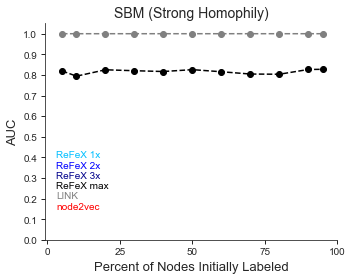

In [350]:
from matplotlib.backends.backend_pdf import PdfPages

alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1) = plt.subplots(1, 1, 
                    sharey=False, sharex=False,
                figsize=(5,4))#(5, 4))

plt.setp(ax1, xticks=[0,25,50,75,100])
#plt.setp(ax1, xticks=[ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ], 
#         xticklabels=school_names)#subset_schools_new)
#plt.setp(ax1.get_xticklabels(), 
#         rotation=90, size = 10)

ax1.set_xticks([0,25,50,75,100])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)

w = 1.5
width = 0.15
#ax1.errorbar(percent_initially_labelled*100, mean_wt_auc_x1_lbfgs,
#            yerr=se_wt_auc_x1, fmt='--o', capthick=2,
#            alpha=1, elinewidth=3, color='deepskyblue')

#ax1.errorbar(percent_initially_labelled*100, mean_wt_auc_x2_lbfgs,
#    yerr=se_wt_auc_x2, fmt='--o', capthick=2,
#    alpha=1, elinewidth=3, color='blue')
#ax1.errorbar(percent_initially_labelled*100, mean_wt_auc_x3_lbfgs,
#    yerr=se_wt_auc_x3, fmt='--o', capthick=2,
#    alpha=1, elinewidth=3, color='darkblue')
ax1.errorbar(percent_initially_labelled*100, mean_wt_auc_xall_lbfgs,
    yerr=se_wt_auc_xall, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='black')
ax1.errorbar(percent_initially_labelled*100, mean_wt_LINK_RM,
    yerr=se_wt_LINK_RM, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='gray')
#ax1.errorbar(percent_initially_labelled*100, mean_wt_node2vec_C,
#    yerr=se_wt_node2vec, fmt='--o', capthick=2,
#    alpha=1, elinewidth=3, color='red')


ax1.annotate('ReFeX 1x', xy=(3, 0.4), 
         color='deepskyblue', alpha=1, size=10)
ax1.annotate('ReFeX 2x', xy=(3, 0.35), 
         color='blue', alpha=1, size=10)
ax1.annotate('ReFeX 3x', xy=(3, 0.30), 
         color='darkblue', alpha=1, size=10)
ax1.annotate('ReFeX max', xy=(3, 0.25), 
        color='black', alpha=1, size=10)
ax1.annotate('LINK', xy=(3, 0.2), 
         color='gray', alpha=1, size=10)
ax1.annotate('node2vec', xy=(3, 0.15), 
         color='red', alpha=1, size=10)


ax1.set_ylabel('AUC', size=13)
ax1.set_xlabel('Percent of Nodes Initially Labeled', size=13)
ax1.set_ylim(0,1.05)
plt.yticks(np.arange(0,1.1,0.1))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xlim(-1,100)
plt.title('SBM (Strong Homophily)',fontsize=14)
#plt.show()
plt.tight_layout()
#pp = PdfPages('../figs/SBM_instance_within_AUC_final.pdf')
#pp.savefig()
#pp.close()

## Set-up as Across-Network Problem

In [21]:
x3_test = pd.read_csv('../../code/refex-rolx-master-3/SBM-data/out_union_0.5SBM_SBM2.csv-featureValues.csv', 
                                  header = -1)

df_test = pd.DataFrame({'keys':np.array(map(np.int,x3_test[0]))})
x3_test = x3_test.loc[:,1::] #drop IDs column
scaler.fit(x3_test) #transform each feature on [0,1]-scale
x3_test = scaler.transform(x3_test)
y_test_y = pd.read_csv('../../data/SBM/SBM2_gender.csv')

y3_test = df_test.merge(y_test_y[['keys','gender_y']], ## will be in same order as features
        how = 'left',
        on = 'keys')

In [39]:
x2_test = pd.read_csv('../../code/refex-rolx-master-2/SBM-data/out_union_0.5SBM_SBM2.csv-featureValues.csv', 
                                  header = -1)

df_test = pd.DataFrame({'keys':np.array(map(np.int,x2_test[0]))})
x2_test = x2_test.loc[:,1::] #drop IDs column
scaler.fit(x2_test) #transform each feature on [0,1]-scale
x2_test = scaler.transform(x2_test)
y_test_y = pd.read_csv('../../data/SBM/SBM2_gender.csv')

y2_test = df_test.merge(y_test_y[['keys','gender_y']], ## will be in same order as features
        how = 'left',
        on = 'keys')

In [195]:
x1_test = pd.read_csv('../../code/refex-rolx-master-1/SBM-data/out_union_0.5SBM_SBM2.csv-featureValues.csv', 
                                  header = -1)

df_test = pd.DataFrame({'keys':np.array(map(np.int,x1_test[0]))})
print(df_test.tail())


x1_test = x1_test.loc[:,1::] #drop IDs column
scaler.fit(x1_test) #transform each feature on [0,1]-scale
x1_test = scaler.transform(x1_test)
y_test_y = pd.read_csv('../../data/SBM/SBM2_gender.csv')

y1_test = df_test.merge(y_test_y[['keys','gender_y']], ## will be in same order as features
        how = 'left',
        on = 'keys')

      keys
1995   259
1996   254
1997   253
1998   256
1999   255


### 6/13/2020 - Across-Network
testing-only here

In [120]:
# set-up to vary training percent, same set of test samples
# 1) LI -- vary degree keep %, or vary % of males
#

### QUESTION -- why for same train/test is AUC != 1

In [121]:
## TRAINING
## ReFeX
xall = pd.read_csv('../../code/refex-rolx-master/SBM_by_degree_test/out_union_0.5SBM_train_SBM_by_degree_within_nw.csv-featureValues.csv',
                  header = -1)
df_train = pd.DataFrame({'keys':np.array(map(np.int,xall[0]))})
xall = xall.loc[:,1::] #drop IDs column
scaler.fit(xall) #transform each feature on [0,1]-scale
xall = scaler.transform(xall)

y_train_y = pd.read_csv('../../data/SBM_by_degree_test/train_SBM_by_degree_within_nw_gender.csv')
yall = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')

In [154]:
## TESTING
#across-network setting
x_test = pd.read_csv('../../code/refex-rolx-master/SBM_by_degree_test/out_union_0.5SBM_SBM_by_degree_across_nw_0.25.csv-featureValues.csv', 
                                  header = -1)

df_test = pd.DataFrame({'keys':np.array(map(np.int,x_test[0]))})
print(df_test.tail())
x_test = x_test.loc[:,1::] #drop IDs column
scaler.fit(x_test) #transform each feature on [0,1]-scale
x_test = scaler.transform(x_test)
y_test_y = pd.read_csv('../../data/SBM_by_degree_test/SBM_by_degree_across_nw_0.25_gender.csv')

y_test = df_test.merge(y_test_y[['keys','gender_y']], ## will be in same order as features
        how = 'left',
        on = 'keys')

      keys
1995  1444
1996  1443
1997  1442
1998  1441
1999  1449


In [137]:
max_depth = [3, 5,10,50]
max_depth.append(None)
min_samples_leaf = [1,5,10]#[0.05, 0.1, 0.2]
min_samples_split = [2,5,10] #[2, 3, 4, 5, 10]
n_estimators = [50, 100, 1000]#150]
max_features = ['auto', 0.25, 0.5, 0.75]
random_grid = {'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf,
                'max_features': max_features,
                'n_estimators': n_estimators,
                'min_samples_split': min_samples_split
                }

clf = sklearn.ensemble.RandomForestClassifier(class_weight = 'balanced_subsample')
model = RandomizedSearchCV(estimator = clf,
                           param_distributions = random_grid,
                           cv = 3, verbose=0,
                           n_jobs = 2, n_iter = 30)

In [142]:
model.fit(xall,
    yall.gender_y)


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=30, n_jobs=2,
          param_distributions={'max_features': ['auto', 0.25, 0.5, 0.75], 'n_estimators': [50, 100, 1000], 'min_samples_split': [2, 5, 10], 'max_depth': [3, 5, 10, 50, None], 'min_samples_leaf': [1, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [155]:
## ROC-AUC
y_predict_refex = model.predict_proba(x_test)[:,1]
print(metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                                y_predict_refex,average='weighted'))
 


0.8106726666666666


In [156]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)), 
                                                       y_predict_refex)

In [157]:
auc_output = auc(recall, precision)
auc_output

0.5497483585995779

In [99]:
## Precision/Recall
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
#fpr, tpr, thresholds = metrics.roc_curve(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)), 
#                                                    y_predict_refex)

precision, recall, thresholds = precision_recall_curve(
                label_binarize(y_test.gender_y,np.unique(y_test.gender_y)), y_predict_refex)
metrics.auc(recall, precision)

0.512756695624049

In [ ]:
## max for across-network: 

In [ ]:
## max for across-layer: 0.85, 0.77

In [85]:
#250 -- 0.738, 0.48
#500 -- 0.63, 0.52
#1k  -- 0.51, 0.53
#imbalanced classed, balanced classes

In [27]:
y_predict_refex = model.predict(x3_test)

y_predict_refex = model.predict_proba(x3_test)[:,1]

print(metrics.roc_auc_score(label_binarize(y3_test.gender_y,np.unique(y3_test.gender_y)),
                                                            y_predict_refex,average='weighted'))


0.531038


In [28]:
y3_auc = metrics.roc_auc_score(label_binarize(y3_test.gender_y,np.unique(y3_test.gender_y)),
                                                            y_predict_refex,average='weighted')

In [42]:
model.fit(x2,
    y2.gender_y)


0.5222955


TypeError: roc_auc_score() takes at least 2 arguments (1 given)

In [44]:
y_predict_refex = model.predict_proba(x2_test)[:,1]

print(metrics.roc_auc_score(label_binarize(y2_test.gender_y,np.unique(y2_test.gender_y)),
                                                            y_predict_refex,average='weighted'))

y2_auc = metrics.roc_auc_score(label_binarize(y2_test.gender_y,np.unique(y2_test.gender_y)),
                                                            y_predict_refex,average='weighted')

0.5222955


In [45]:
model.fit(x1,
    y1.gender_y)


y_predict_refex = model.predict_proba(x1_test)[:,1]

print(metrics.roc_auc_score(label_binarize(y1_test.gender_y,np.unique(y1_test.gender_y)),
                                                            y_predict_refex,average='weighted'))

y1_auc = metrics.roc_auc_score(label_binarize(y1_test.gender_y,np.unique(y1_test.gender_y)),
                                                            y_predict_refex,average='weighted')

0.509936


In [157]:
model.fit(xall,
    yall.gender_y)


y_predict_refex = model.predict_proba(x_test)[:,1]


In [158]:
## across-layer
print(metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                                            y_predict_refex,average='weighted'))



0.827958


In [63]:
## across-network
print(metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                                            y_predict_refex,average='weighted'))

#y_auc = metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
#                                                            y_predict_refex,average='weighted')

0.6212449999999999


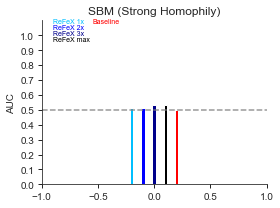

In [62]:
from matplotlib.backends.backend_pdf import PdfPages

alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1) = plt.subplots(1, 1, 
                             sharey=False, sharex=False,
                            figsize=(4, 3))
#plt.setp(ax1, xticks=[ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ], 
#         xticklabels=x_labels)
#plt.setp(ax1.get_xticklabels(), rotation=90)

#ax1.set_xticks([0,0.25, 0.5, 0.75, 1])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)


w = 0.5
width = 0.03
ax1.bar(0.2,0.5, color = 'red', #alpha = 0.5,
        #align = 'right',
       width = width, edgecolor = 'white')

ax1.bar(-0.2,y1_auc, color = 'deepskyblue',# alpha = 0.5,
       # align = 'center',
       width = width, edgecolor = 'white')
ax1.bar(-0.1,y1_auc, color = 'blue', #alpha = 0.5,
       # align = 'center',
       width = width, edgecolor = 'white')
ax1.bar(0,y3_auc, color = 'darkblue', #alpha = 0.5,
       # align = 'center',
       width = width, edgecolor = 'white')
ax1.bar(0.1,y_auc, color = 'black', #alpha = 0.5,
       # align = 'center',
       width = width, edgecolor = 'white')
ax1.set_ylabel('AUC')
#ax1.set_xlabel(np.array(range(len(acc_generic)))*w,
#           x_labels[0:11],
#          rotation = 90)
ax1.set_xlim(-1,1)
ax1.set_ylim(0,1.1)
plt.yticks(np.arange(0,1.1,0.1))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)


ax1.annotate('ReFeX 1x', xy=(-0.9,1.08), 
                 color='deepskyblue', alpha=1, size=7)
ax1.annotate('ReFeX 2x', xy=(-0.9,1.08-0.04), 
                 color='blue', alpha=1, size=7)
ax1.annotate('ReFeX 3x', xy=(-0.9,1.08-0.04*2), 
                 color='darkblue', alpha=1, size=7)
ax1.annotate('ReFeX max', xy=(-0.9,1.08-0.04*3), 
                 color='black', alpha=1, size=7)
ax1.annotate('Baseline', xy=(-0.55,1.08), 
                 color='red', alpha=1, size=7)

plt.title('SBM (Strong Homophily)')
#plt.show()

plt.tight_layout()
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)
plt.tight_layout()
pp = PdfPages('../figs/SBM_instance_across_AUC_final.pdf')
pp.savefig()
pp.close()